# Bayesian Optimization

Testing Bayesian Optimization package : https://github.com/fmfn/BayesianOptimization

In [1]:
!pip install bayesian-optimization

In [2]:
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [3]:
# Create a target function
def target(x):
    return np.exp(-(x - 2)**2) + np.exp(-(x - 6)**2/10) + 2/ (x**2 + 1)

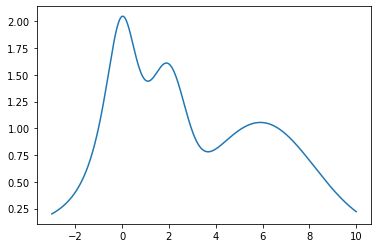

In [4]:
x = np.linspace(-3, 10, 10000).reshape(-1, 1)
y = target(x)
plt.plot(x, y);

In [5]:
# Create a BayesianOptimization object
optimizer = BayesianOptimization(target, {'x': (-3, 10)}, random_state=44)

In [6]:
# In this example we will use the Upper Confidence Bound (UCB) as our utility function. 
# It has the free parameter kappa which control the balance between exploration and exploitation; 
# we will set kappa=5 which, in this case, makes the algorithm quite bold.

optimizer.maximize(init_points=2, n_iter=0, kappa=5)
# optimizer.maximize(init_points=2, n_iter=0, kappa=0.1)

|   iter    |  target   |     x     |
-------------------------------------
|  1        |  0.7413   |  7.853    |
|  2        |  0.5461   | -1.638    |


In [7]:
def posterior(optimizer, x_obs, y_obs, grid):
    optimizer._gp.fit(x_obs, y_obs)

    mu, sigma = optimizer._gp.predict(grid, return_std=True)
    return mu, sigma

def plot_gp(optimizer, x, y, i=0):
    fig = plt.figure(figsize=(16, 10))
    steps = len(optimizer.space)
    fig.suptitle(
        'Gaussian Process and Utility Function After {} Steps'.format(steps),
        fontdict={'size':30}
    )
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    axis = plt.subplot(gs[0])
    acq = plt.subplot(gs[1])
    
    x_obs = np.array([[res["params"]["x"]] for res in optimizer.res])
    y_obs = np.array([res["target"] for res in optimizer.res])
    
    mu, sigma = posterior(optimizer, x_obs, y_obs, x)
    axis.plot(x, y, linewidth=3, label='Target')
    axis.plot(x_obs.flatten(), y_obs, 'D', markersize=8, label=u'Observations', color='r')
    axis.plot(x, mu, '--', color='k', label='Prediction')

    axis.fill(np.concatenate([x, x[::-1]]), 
              np.concatenate([mu - 1.9600 * sigma, (mu + 1.9600 * sigma)[::-1]]),
        alpha=.6, fc='silver', ec='None', label='95% confidence interval')
    
    axis.set_xlim((-2, 10))
    axis.set_ylim((-0.5, 2.5))
    axis.set_ylabel('f(x)', fontdict={'size':20})
    axis.set_xlabel('x', fontdict={'size':20})
    
    utility_function = UtilityFunction(kind="ucb", kappa=5, xi=0)
    utility = utility_function.utility(x, optimizer._gp, 0)
    acq.plot(x, utility, label='Utility Function', color='purple')
    acq.plot(x[np.argmax(utility)], np.max(utility), '*', markersize=15, 
             label=u'Next Best Guess', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1)
    acq.set_xlim((-2, 10))
    acq.set_ylim((0, np.max(utility) + 0.5))
    acq.set_ylabel('Utility', fontdict={'size':20})
    acq.set_xlabel('x', fontdict={'size':20})
    
    axis.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    acq.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    plt.savefig(f"/content/drive/MyDrive/Notebooks_BayesianOptim/figs/graph{i}.png")

In [8]:
# Select two random points
# After we probe two points at random, we can fit a Gaussian Process and start 
# the bayesian optimization procedure. 
# Two points should give us a uneventful posterior with the uncertainty growing 
# as we go further from the observations.

#plot_gp(optimizer, x, y)


In [9]:
# optimizer.maximize(init_points=0, n_iter=1, kappa=5)
# plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  3        |  1.61     |  1.875    |
|   iter    |  target   |     x     |
-------------------------------------
|  4        |  0.3808   | -2.067    |
|   iter    |  target   |     x     |
-------------------------------------
|  5        |  0.9215   |  4.643    |
|   iter    |  target   |     x     |
-------------------------------------
|  6        |  0.2217   |  10.0     |
|   iter    |  target   |     x     |
-------------------------------------
|  7        |  1.615    |  0.6619   |
|   iter    |  target   |     x     |
-------------------------------------
|  8        |  1.007    |  2.949    |
|   iter    |  target   |     x     |
-------------------------------------
|  9        |  1.044    |  6.248    |
|   iter    |  target   |     x     |
-------------------------------------
|  10       |  1.456    |  1.257    |
|   iter    |  target   |     x     |
-------------------------------------
|  11       

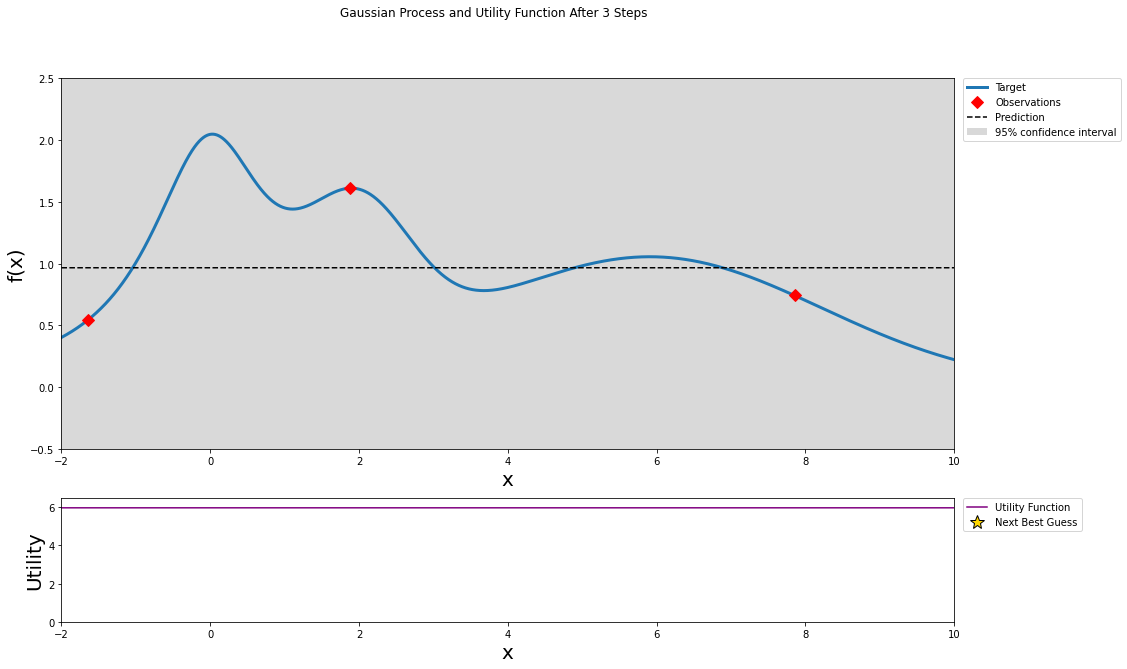

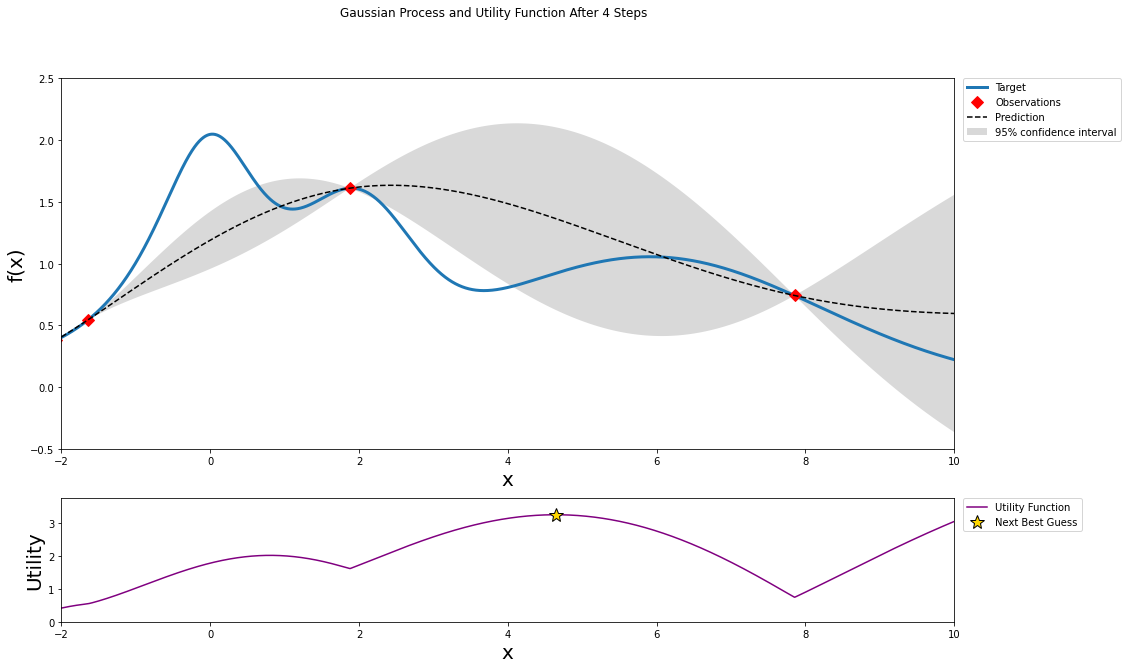

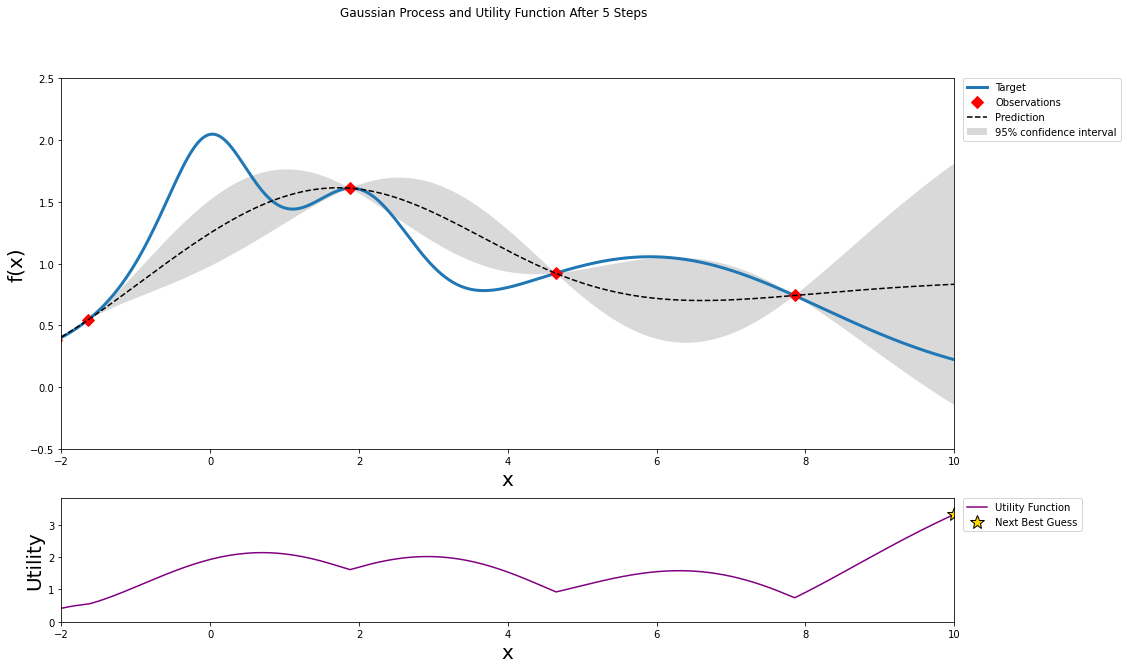

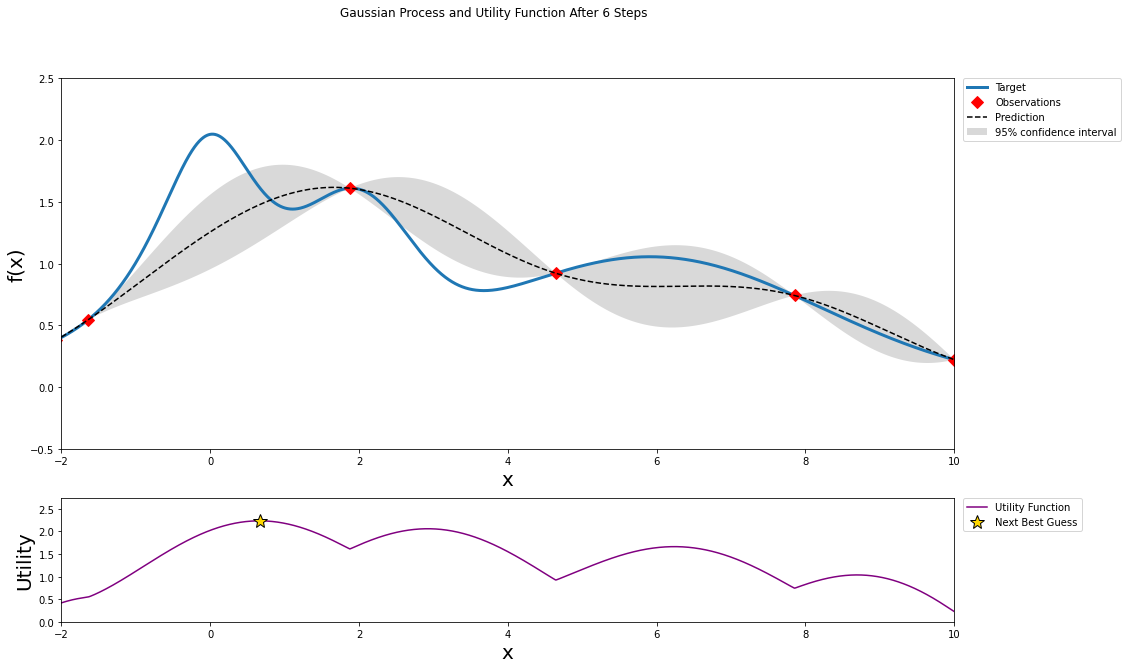

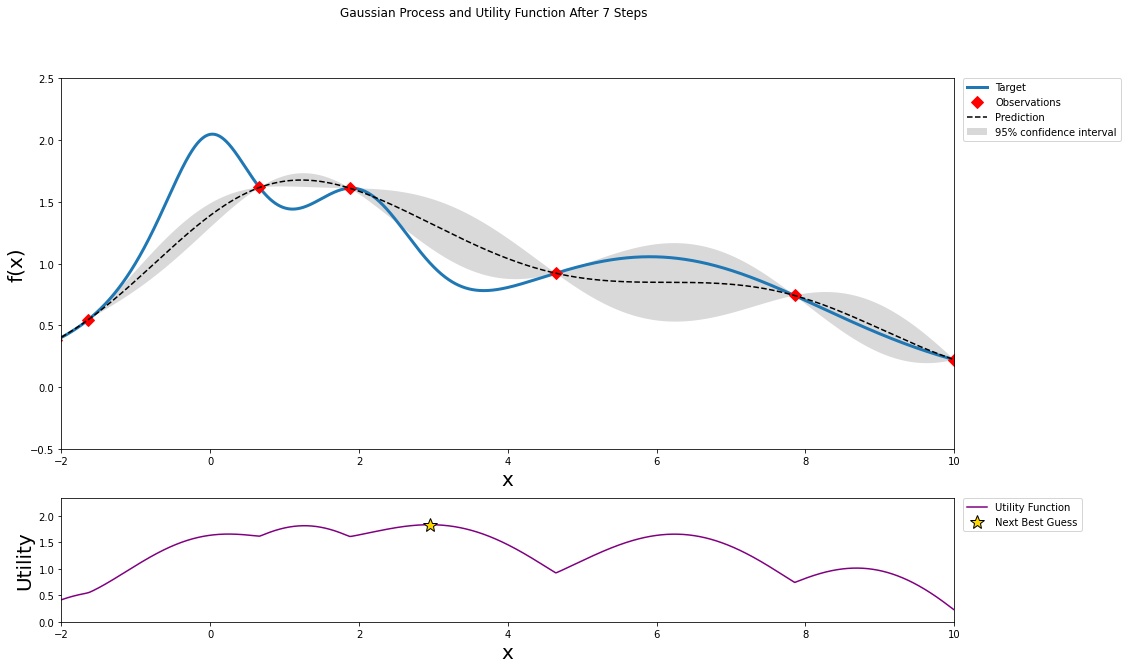

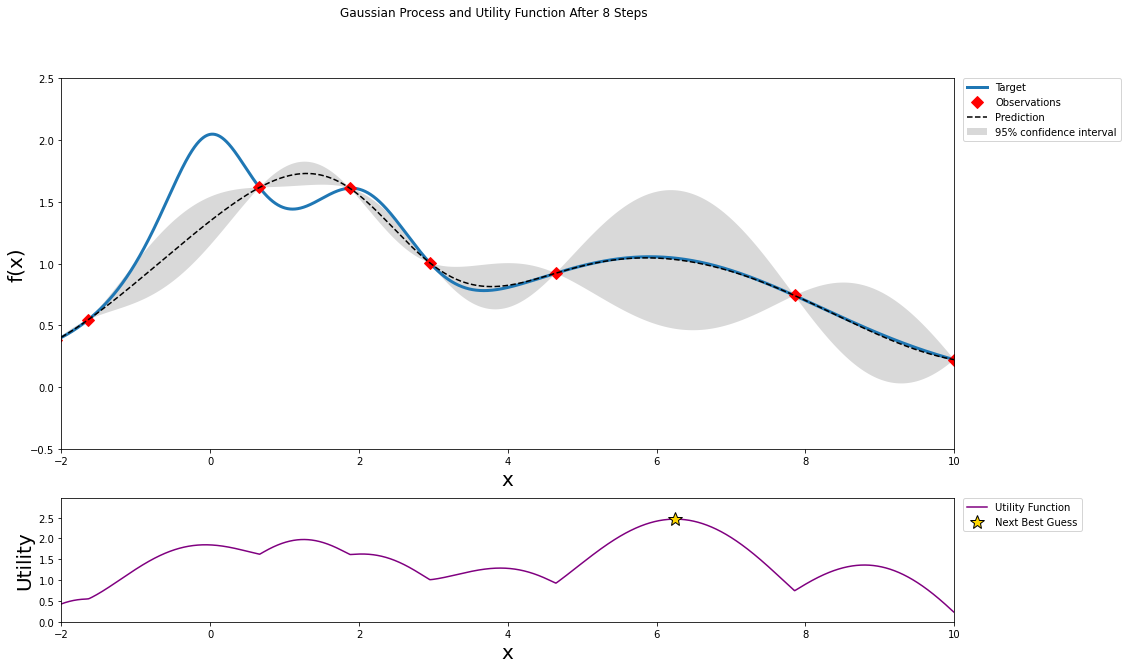

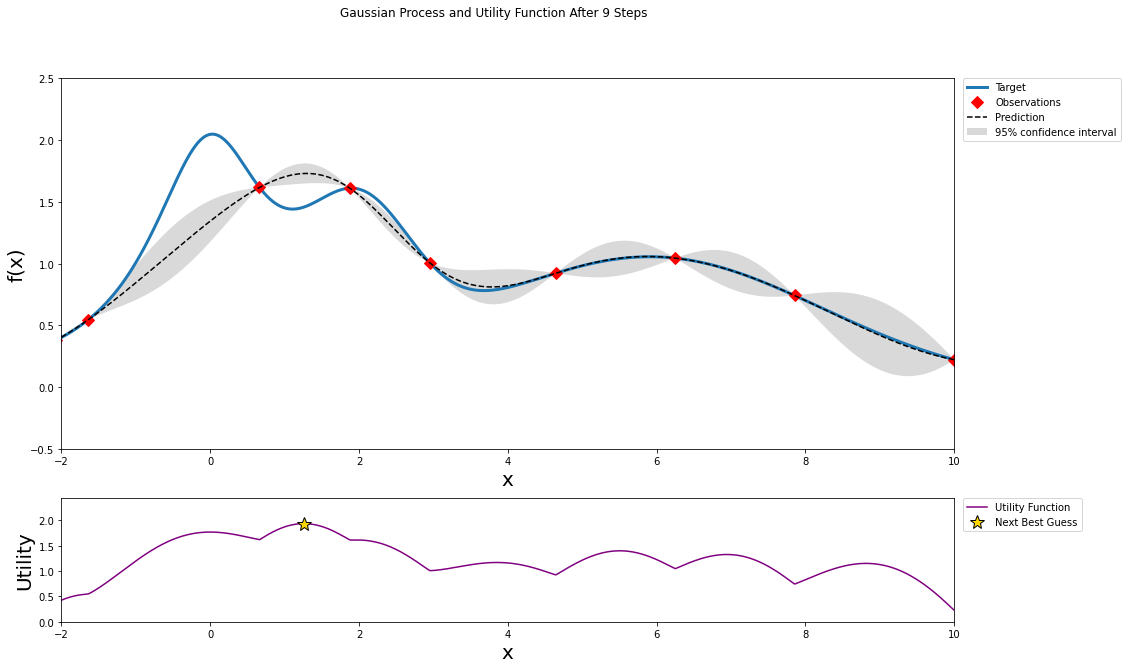

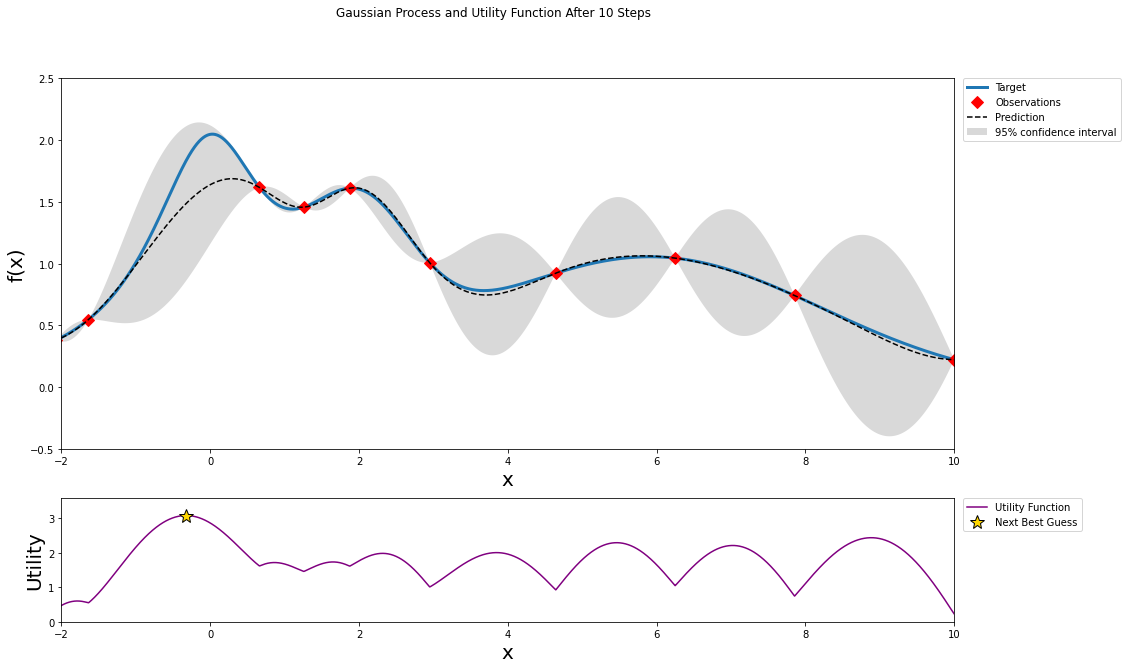

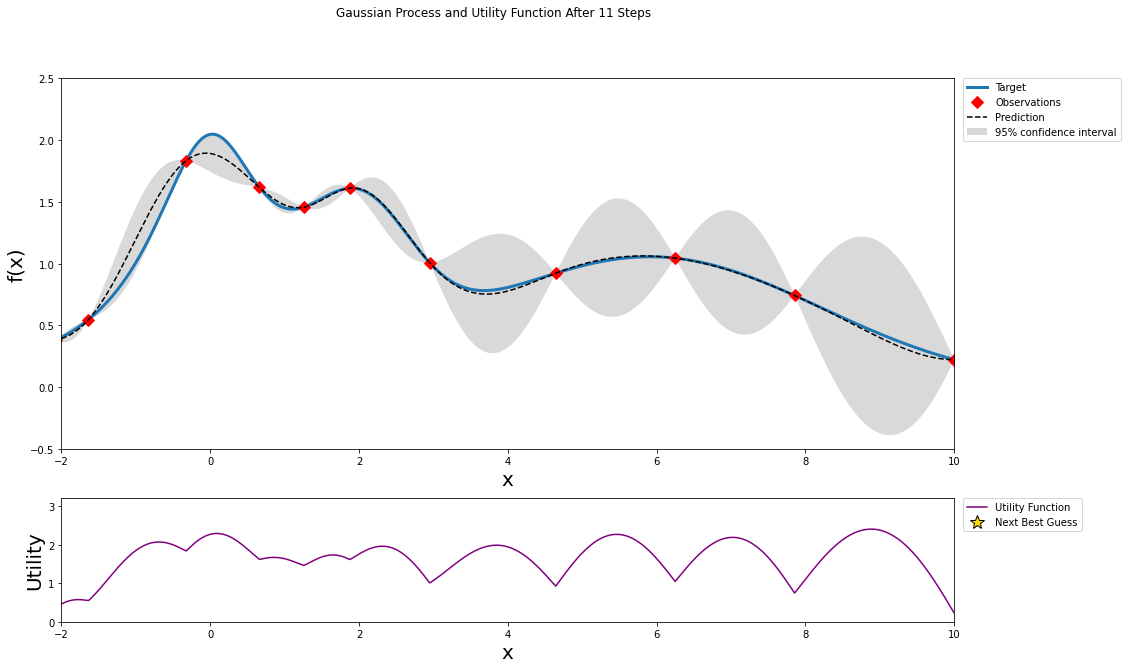

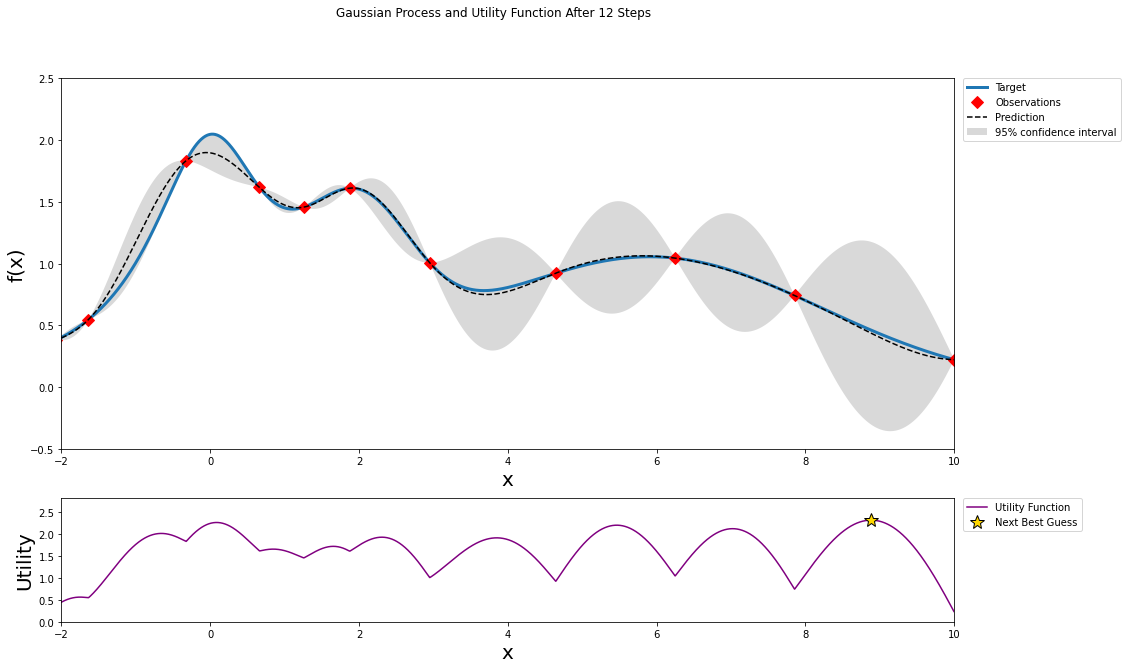

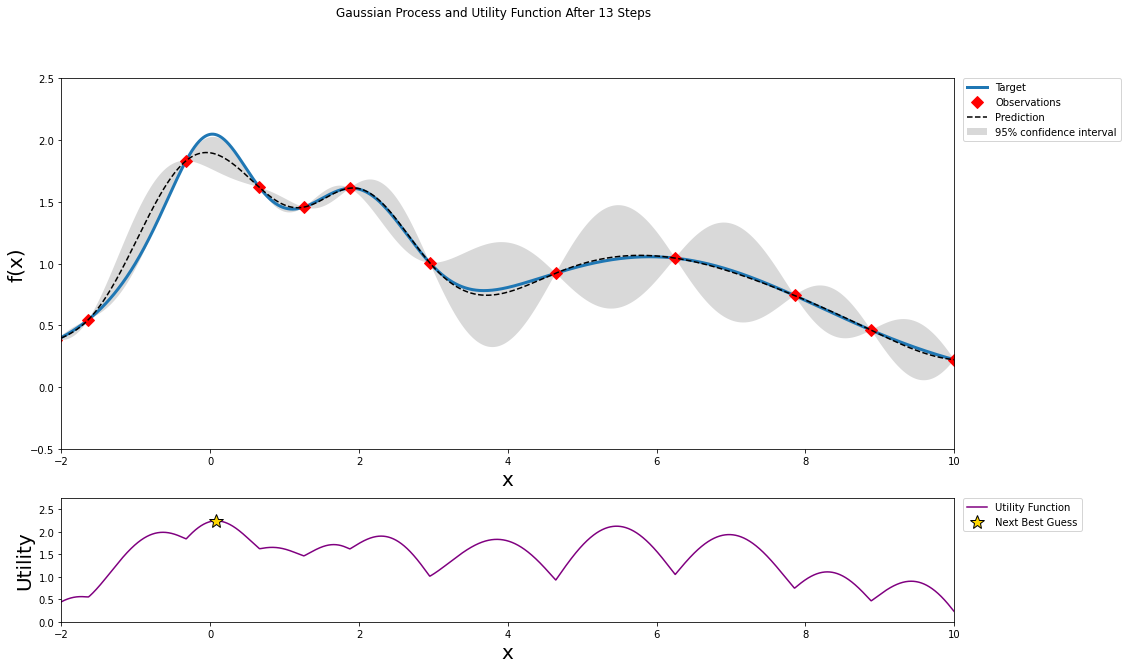

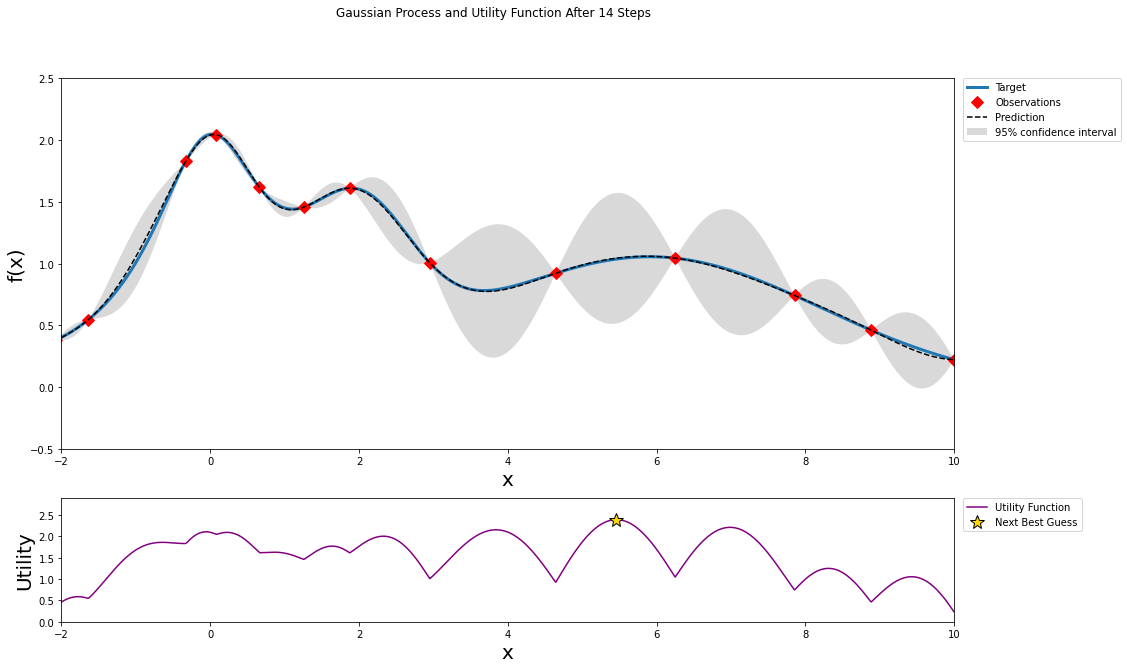

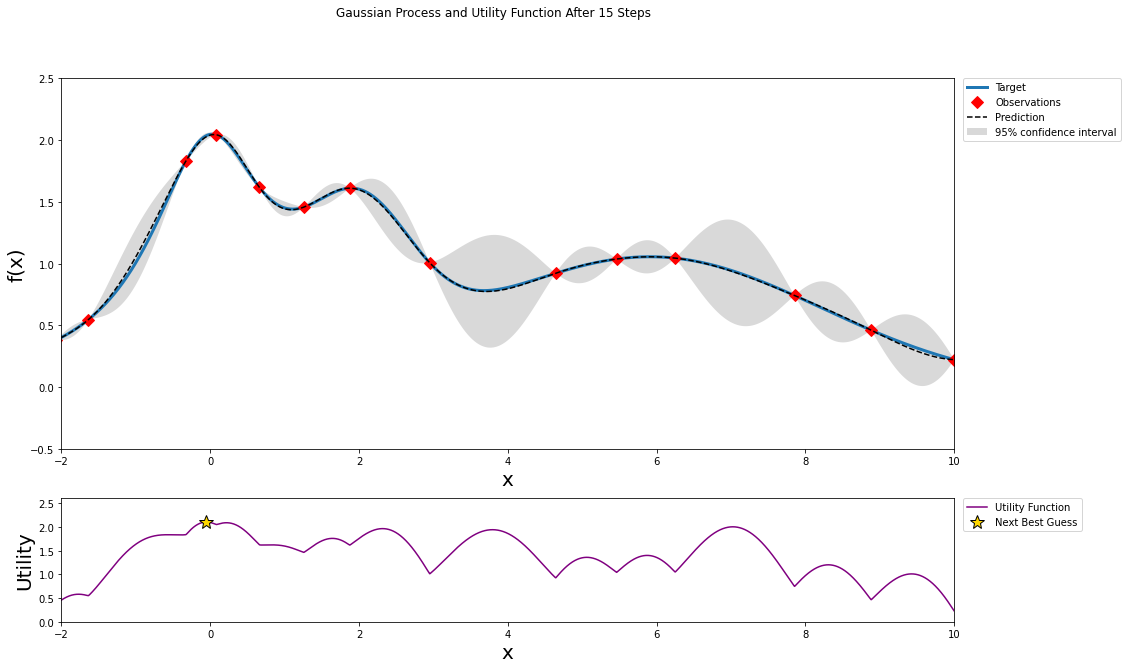

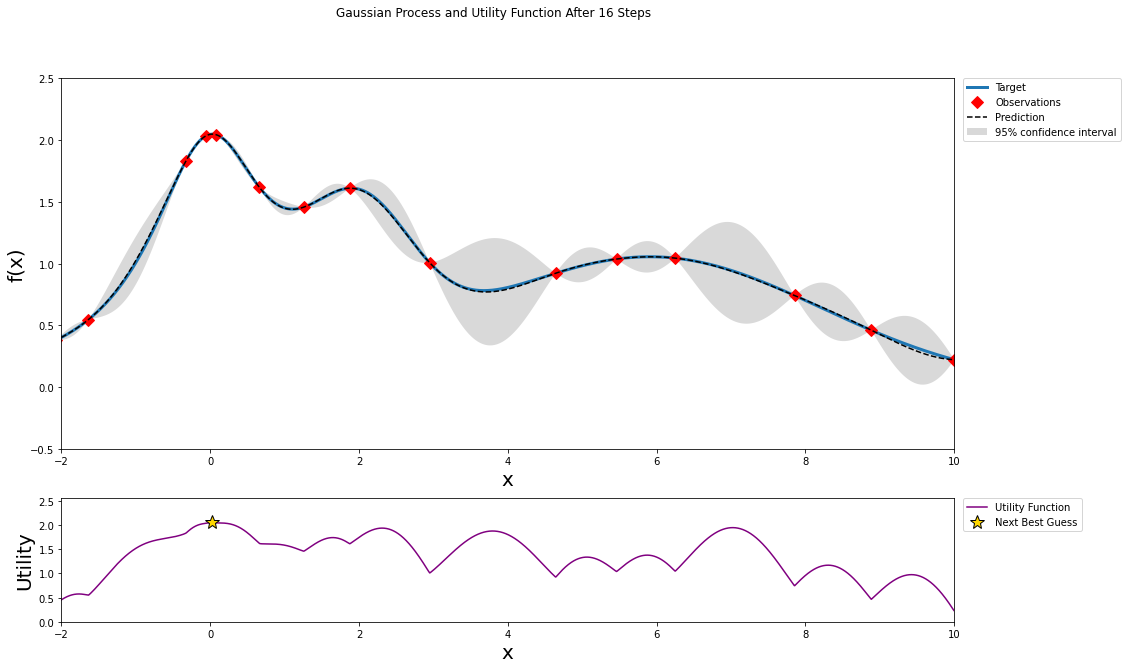

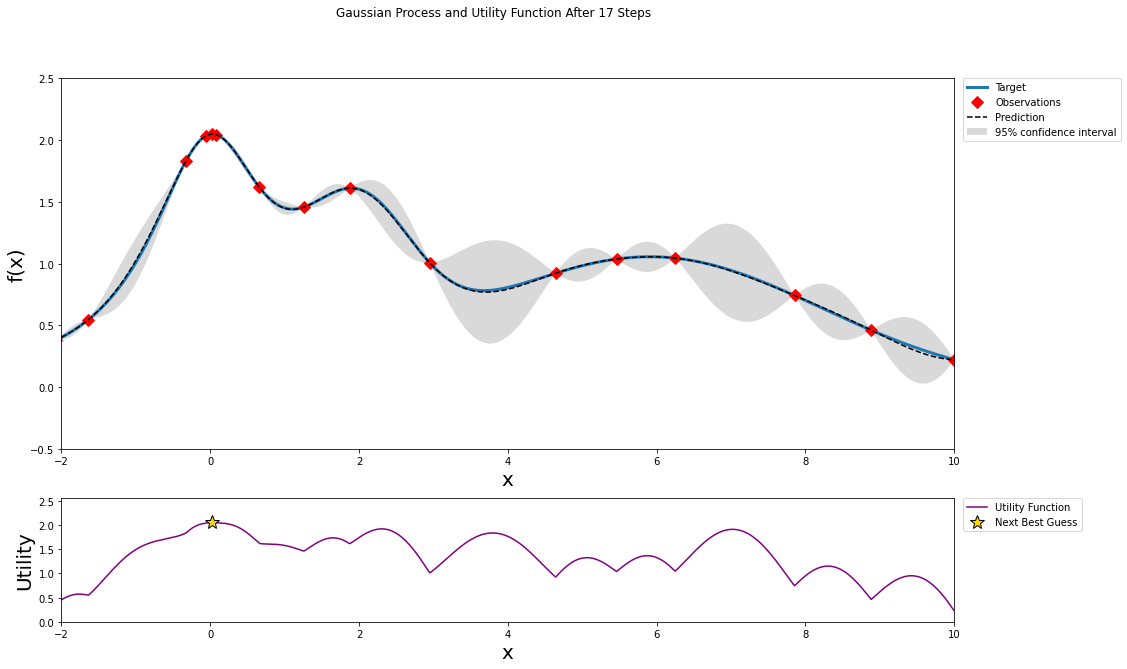

In [10]:
# Perform iterations
for i in range(15):
    optimizer.maximize(init_points=0, n_iter=1, kappa=5)
    plot_gp(optimizer, x, y, i)

In [11]:
# Create a gif from the images
import imageio
images = []

for i in range(0, 15):
    images.append(imageio.imread(f"/content/drive/MyDrive/Notebooks_BayesianOptim/figs/graph{i}.png"))
    
imageio.mimsave('/content/drive/MyDrive/Notebooks_BayesianOptim/figs/fig1.gif', images, duration=1)